## LoRA implementation with PyTorch

In [1]:
import torch
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Make torch deterministic
_ = torch.manual_seed(0)

### We will be training a network to classify MNIST digits and then fine-tune the network on a particular digit on which it doesn't perform well.

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Load the MNIST dataset
mnist_trainset = datasets.MNIST(root='./data', 
                                train=True, 
                                download=True, 
                                transform=transform)

# Create a dataloader for the training
train_loader = torch.utils.data.DataLoader(mnist_trainset, 
                                           batch_size=10, 
                                           shuffle=True)

# Load the MNIST test set
mnist_testset = datasets.MNIST(root='./data', 
                               train=False, 
                               download=True, 
                               transform=transform)

test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

# Define the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

100%|██████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 14867073.38it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 28821245.26it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




100%|██████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 11644581.12it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



### Create the Neural Network to classify the digits, making it deep (more parameters) to better show the power of LoRA

In [6]:
# Create an deep neural network to classify MNIST digits

class NNet(nn.Module):
    def __init__(self, hidden_size_1=1000, hidden_size_2=2000):
        super(NNet,self).__init__()
        self.linear1 = nn.Linear(28*28, hidden_size_1) 
        self.linear2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.linear3 = nn.Linear(hidden_size_2, 10)
        self.relu = nn.ReLU()

    def forward(self, img):
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x

net = NNet().to(device)

In [7]:
net

NNet(
  (linear1): Linear(in_features=784, out_features=1000, bias=True)
  (linear2): Linear(in_features=1000, out_features=2000, bias=True)
  (linear3): Linear(in_features=2000, out_features=10, bias=True)
  (relu): ReLU()
)

A scaled down representation of the neural network

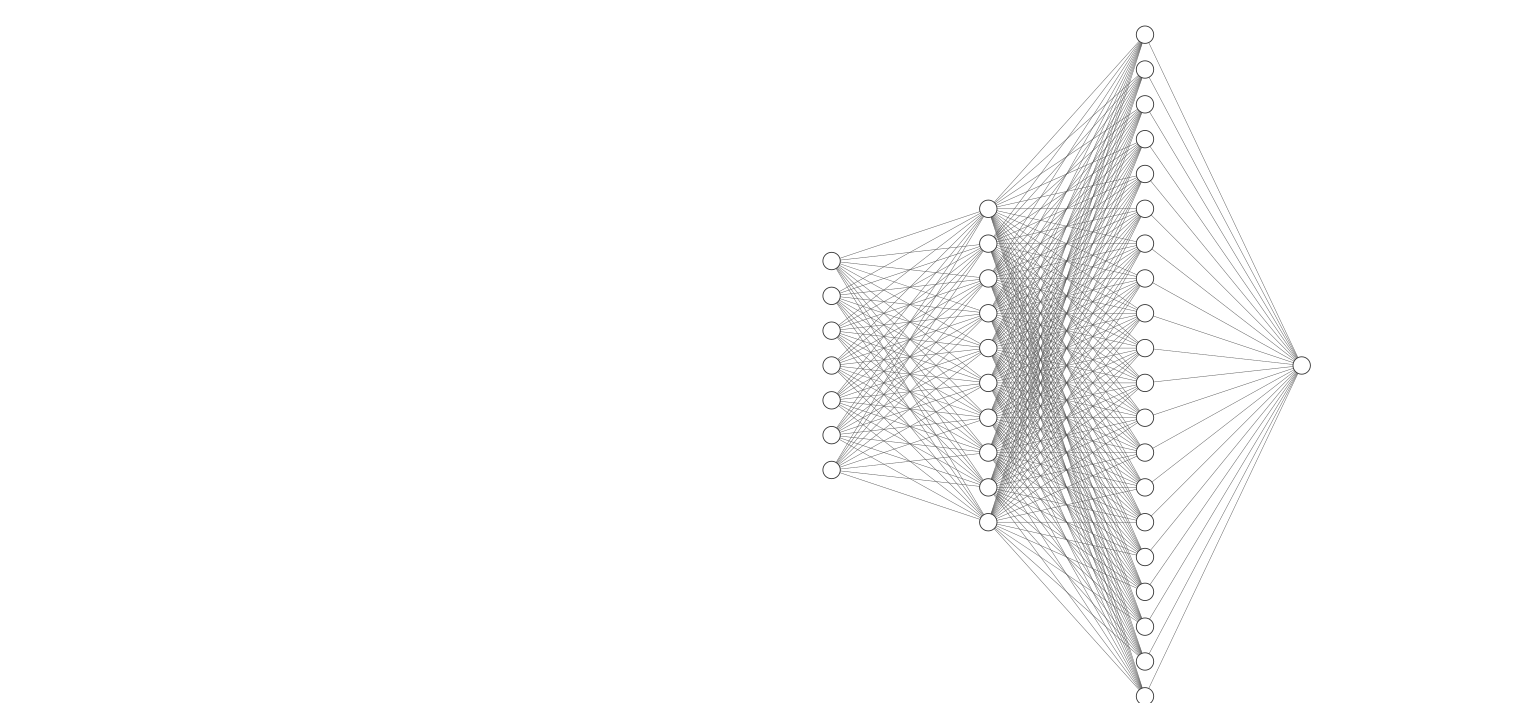

In [10]:
from IPython.core.display import SVG
SVG(filename='./assets/nn.svg')